In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/url_dataset_processed.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101367 entries, 0 to 1101366
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   url                 1101367 non-null  object 
 1   result              1101367 non-null  int64  
 2   domain_length       1101367 non-null  int64  
 3   domain_entropy      1101367 non-null  float64
 4   is_ip               1101367 non-null  int64  
 5   has_malicious_ext   1101367 non-null  int64  
 6   query_params_count  1101367 non-null  int64  
 7   path_tokens_count   1101367 non-null  int64  
 8   hyphens_count       1101367 non-null  int64  
 9   digits_count        1101367 non-null  int64  
 10  has_special_chars   1101367 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 92.4+ MB


In [ ]:
x = df.drop(columns=["url", "result"]);
x.sample(20)

,domain_length,domain_entropy,is_ip,has_malicious_ext,query_params_count,path_tokens_count,hyphens_count,digits_count,has_special_chars
820754,99,3.24,0,0,5,2,0,3,1
763088,34,3.20,0,0,0,0,0,0,0
273549,80,0.00,0,0,0,4,4,6,0
228436,47,0.00,0,0,1,3,0,0,1
604241,41,0.00,0,0,0,4,0,0,0
884711,51,2.95,0,0,0,3,0,0,0
128013,38,0.00,0,0,1,3,0,6,0
481513,47,0.00,0,0,1,3,1,6,0
842904,39,2.78,0,0,0,1,0,0,0
751663,104,3.18,0,0,0,4,9,8,0


In [ ]:
y = df["result"]
y.sample(20)

679243    0
722751    0
749307    0
500568    0
536436    1
205280    0
894603    0
692743    0
836583    0
308720    0
85957     1
180147    0
979608    0
942500    0
227652    0
110601    1
524072    1
639740    1
174771    1
642902    1
Name: result, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# split the dataset into 80% training data and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# print the sizes of the training and testing sets
print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))

Training set size: 881093
Testing set size: 220274


In [ ]:
import math
import string
import socket
import os
from urllib.parse import urlparse
from urllib.parse import urlparse


def get_domain_length(url):
    """
    Returns the length of the entire URL.
    """
    return len(url)


def get_domain_entropy(url):
    """
    Returns the entropy of the domain name.
    """
    domain = urlparse(url).netloc
    alphabet = string.ascii_lowercase + string.digits
    freq = [0] * len(alphabet)
    for char in domain:
        if char in alphabet:
            freq[alphabet.index(char)] += 1
    entropy = 0
    for count in freq:
        if count > 0:
            freq_ratio = float(count) / len(domain)
            entropy -= freq_ratio * math.log(freq_ratio, 2)
    return round(entropy,2)


def is_ip_address(url):
    """
    Returns True if the URL uses an IP address instead of a domain name.
    """
    domain = urlparse(url).netloc
    try:
        socket.inet_aton(domain)
        return 1
    except socket.error:
        return 0


def has_malicious_extension(url):
    _, ext = os.path.splitext(url)
    malicious_extensions = ['.exe', '.dll', '.bat', '.cmd', '.scr', '.js', '.vbs',
                            '.hta', '.ps1', '.jar', '.py', '.rb']

    if ext.lower() in malicious_extensions:
        return 1
    else:
        return 0


def query_params_count(url):
    """
    Returns Number of query parameters in the URL
    """
    parsed = urlparse(url)
    query_params = parsed.query.split('&')
    if query_params[0] == '':
        return 0
    else:
        return len(query_params)


def path_tokens_count(url):
    """
    Returns Number of path tokens
    """
    parsed = urlparse(url)
    path_tokens = parsed.path.split('/')
    path_tokens = [token for token in path_tokens if token]  # remove empty tokens
    return len(path_tokens)


def hyphens_count(url):
    """
    Returns the number of hyphens in the entire URL
    """
    parsed = urlparse(url)
    return url.count('-')


def digits_count(url):
    """
    Returns Number of digits in the entire URL
    """
    return sum(c.isdigit() for c in url)


def has_special_characters(url):
    special_chars = ['@', '!', '#', '$', '%', '^', '&', '*', '_', '+']
    for char in special_chars:
        if char in url:
            return 1
    return 0


def getInputArray(url):
    result = []
    result.append(get_domain_length(url))
    result.append(get_domain_entropy(url))
    result.append(is_ip_address(url))
    result.append(has_malicious_extension(url))
    result.append(query_params_count(url))
    result.append(path_tokens_count(url))
    result.append(hyphens_count(url))
    result.append(digits_count(url))
    result.append(has_special_characters(url))
    return result

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# print input shape
x_train.shape

(881093, 9)

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (9, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# define the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the random forest classifier
print("Model Training started !")
clf.fit(x_train, y_train)
print("Model Training finished !")

# make predictions on the test set
y_pred = clf.predict(x_test)

# evaluate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Model Training started !
Model Training finished !
Test accuracy: 0.8775


Model Training started !
[LightGBM] [Info] Number of positive: 262216, number of negative: 618877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 881093, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297603 -> initscore=-0.858738
[LightGBM] [Info] Start training from score -0.858738
Model Training finished !
Test accuracy: 0.8589


NameError: ignored

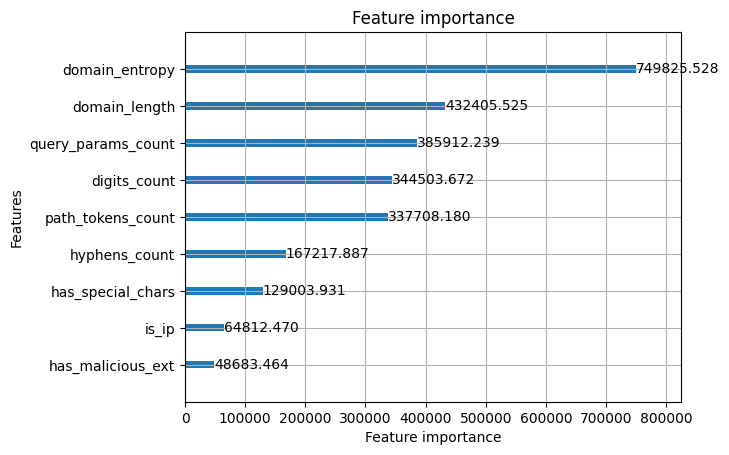

In [ ]:
import pickle
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# define the LightGBM classifier
clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=100, max_depth=-1, random_state=42)

# train the LightGBM classifier
print("Model Training started !")
clf.fit(x_train, y_train)
print("Model Training finished !")

# make predictions on the test set
y_pred = clf.predict(x_test)

# evaluate the accuracy of the LightGBM classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# plot the feature importances
lgb.plot_importance(clf, importance_type='gain')
plt.show()

In [ ]:
import pickle

# export the trained classifier using pickle
with open('/content/drive/MyDrive/Colab Notebooks/random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the trained model
with open('/content/drive/MyDrive/Colab Notebooks/random_forest_classifier.pkl', 'rb') as file:
    clf = pickle.load(file)

# Function to make predictions on a list of URLs
def predict_urls(urls):
    features = [getInputArray(url) for url in urls]
    predictions = clf.predict(features)
    return predictions

In [ ]:
import requests
def check_Nortan_WebSafe(url):
    try:
        response = requests.get(
            f"https://safeweb.norton.com/report/show?url={url}")
        html_content = response.text
        if "known dangerous webpage" in html_content:
            return False
        else:
            return True
    except Exception as e:
        print(f"An error occurred: {e}")
        return True

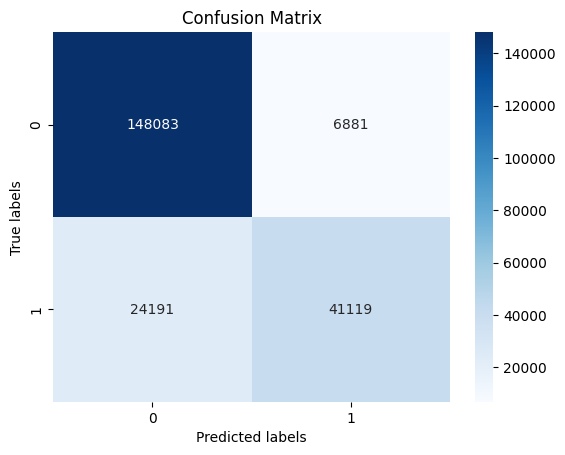

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


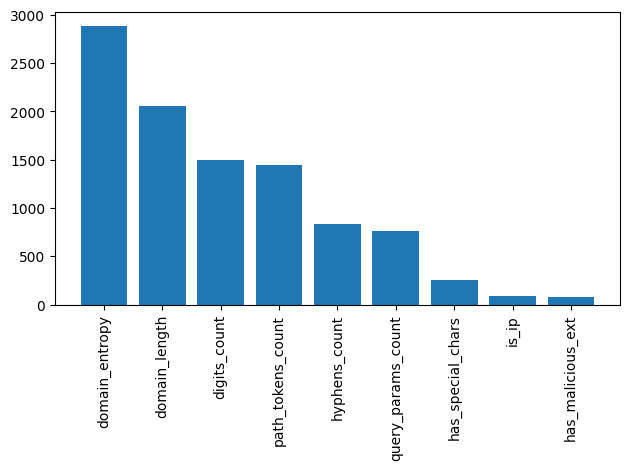

In [ ]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), list(x_train.columns[indices]), rotation=90)
plt.tight_layout()
plt.show()